In [102]:
from citipy import citipy
import json
from pprint import pprint
import requests
from random import uniform
import pandas as pd
from API_KEYS import OWM_API
import matplotlib.pyplot as plt


In [107]:
# Get random range of Lat and Long
LatLng=[]
def newpoint():
   return uniform(-180,180), uniform(-90, 90)

points = (newpoint() for x in range(800))
for point in points:
    LatLng.append(point)

In [108]:
# Create dataframe to hold coordinates
Lat=[]
for i in range(len(LatLng)):
    Lat.append(LatLng[i][1])

Lng=[]
for i in range(len(LatLng)):
    Lng.append(LatLng[i][0])
    
LatLng_df = pd.DataFrame({
    'Lat': Lat,
    'Lng': Lng
})
LatLng_df.head()

,Lat,Lng
0,9.134759,-164.057578
1,-43.701199,-91.658206
2,-26.264686,24.966644
3,35.467973,118.796715
4,-87.621903,-152.066012


In [109]:
#use citipy to get city names for those coordinates and add to dataframe
cities=[]
for index, row in LatLng_df.iterrows():
 
   # get lat/lon from df
    lat=row['Lat']
    lng=row['Lng']

    city = citipy.nearest_city(lat,lng)
    cities.append(city.city_name )
    LatLng_df.loc[index, "City"] = city.city_name
    
#cities
LatLng_df.head()

,Lat,Lng,City
0,9.134759,-164.057578,makakilo city
1,-43.701199,-91.658206,castro
2,-26.264686,24.966644,vryburg
3,35.467973,118.796715,juxian
4,-87.621903,-152.066012,mataura


{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 48.14, 'lon': 11.58},
 'dt': 1529011200,
 'id': 2867714,
 'main': {'humidity': 93,
          'pressure': 1018,
          'temp': 283.88,
          'temp_max': 285.15,
          'temp_min': 282.15},
 'name': 'Munich',
 'sys': {'country': 'DE',
         'id': 4887,
         'message': 0.0054,
         'sunrise': 1528945976,
         'sunset': 1529003731,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'speed': 0.5}}


In [110]:
# Loop through the cities_pd and run a lat/long search for each city
query_params = {
    'appid': OWM_API,
    'units': 'standard'
}
for index, row in LatLng_df.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather"

    city = row['City']

    # update address key value
    query_params['q'] = f"{city}"

    # make request, print url
    weather_response = requests.get(url, params=query_params)
    
    # convert to json
    weather_json = weather_response.json()
    #pprint(weather_json)
    
    # since the weather API does not have information for all cities, a try-except statement was added
    try:
        temperature = weather_json["main"]["temp"]
        humidity= weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        windSpeed= weather_json["wind"]["speed"]

        LatLng_df.loc[index, "temperature"] = temperature 
        LatLng_df.loc[index, "humidity"] = humidity
        LatLng_df.loc[index, "cloudiness"] = cloudiness
        LatLng_df.loc[index, "windSpeed"] = windSpeed
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    



Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

In [111]:
# Remove the rows with missing data
LatLng_df = LatLng_df.dropna(how="any")
LatLng_df.head()

,Lat,Lng,City,temperature,humidity,cloudiness,windSpeed
0,9.134759,-164.057578,makakilo city,302.650,66.0,40.0,5.10
1,-43.701199,-91.658206,castro,278.672,100.0,92.0,5.01
2,-26.264686,24.966644,vryburg,278.622,61.0,0.0,3.86
4,-87.621903,-152.066012,mataura,279.522,92.0,48.0,1.81
5,48.919220,120.745669,yakeshi,289.472,90.0,12.0,5.71


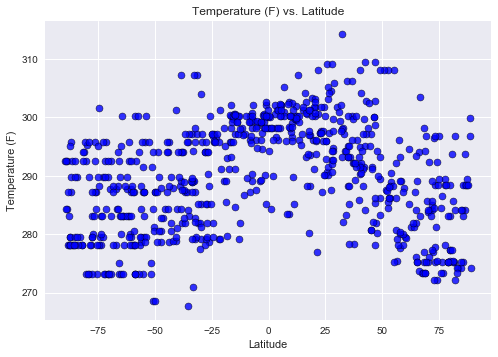

In [112]:

# Plot the scatter graph
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# one scatter plot for each Type ( Urban, suburban, rural)
scatter=plt.scatter( LatLng_df ["Lat"],LatLng_df ["temperature"], marker="o",c= "blue",
                     alpha=0.8,edgecolor="black",linewidths=0.5 )


# Customize the grid
plt.style.use('seaborn')

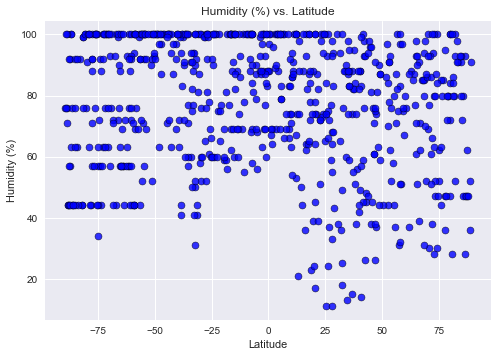

In [113]:
# Plot the scatter graph
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# one scatter plot for each Type ( Urban, suburban, rural)
scatter=plt.scatter( LatLng_df ["Lat"],LatLng_df ["humidity"], marker="o",c= "blue",
                     alpha=0.8,edgecolor="black",linewidths=0.5)


# Customize the grid
plt.style.use('seaborn')

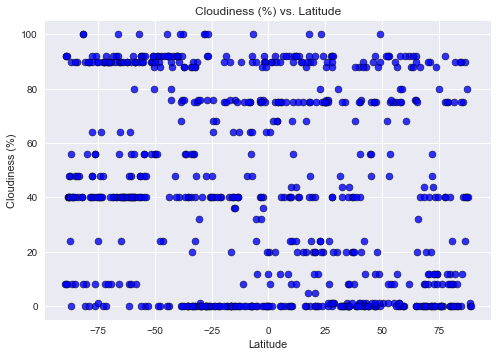

In [114]:
# Plot the scatter graph
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# one scatter plot for each Type ( Urban, suburban, rural)
scatter=plt.scatter( LatLng_df ["Lat"],LatLng_df ["cloudiness"], marker="o",c= "blue",
                     alpha=0.8,edgecolor="black",linewidths=0.5)


# Customize the grid
plt.style.use('seaborn')

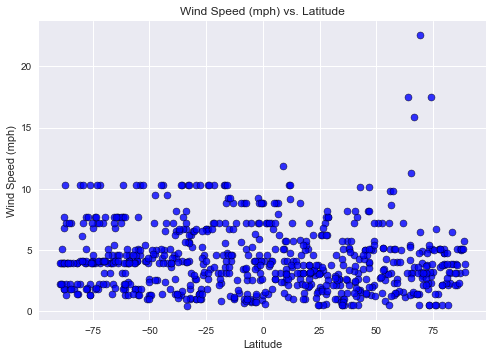

In [115]:
# Plot the scatter graph
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# one scatter plot for each Type ( Urban, suburban, rural)
scatter=plt.scatter( LatLng_df ["Lat"],LatLng_df ["windSpeed"], marker="o",c= "blue",
                     alpha=0.8,edgecolor="black",linewidths=0.5)


# Customize the grid
plt.style.use('seaborn')